**Customer Segmentation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
#Identifying missing values and data types.
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used       

In [4]:
# Missing values.
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Values per Column:")
print(missing_df)


Missing Values per Column:
                        Missing Values  Percentage
Customer ID                          0         0.0
Age                                  0         0.0
Gender                               0         0.0
Item Purchased                       0         0.0
Category                             0         0.0
Purchase Amount (USD)                0         0.0
Location                             0         0.0
Size                                 0         0.0
Color                                0         0.0
Season                               0         0.0
Review Rating                        0         0.0
Subscription Status                  0         0.0
Shipping Type                        0         0.0
Discount Applied                     0         0.0
Promo Code Used                      0         0.0
Previous Purchases                   0         0.0
Payment Method                       0         0.0
Frequency of Purchases               0         0.0


No missing values were found.

 Customer ID is an ID that does not contribute to analysis.

In [5]:
if 'Customer ID' in df.columns:
    df.drop(columns=['Customer ID'], inplace=True)

In [6]:
# Data types and unique values for categorical columns.
print("\nCategorical Column Analysis:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


Categorical Column Analysis:
Gender: 2 unique values
Item Purchased: 25 unique values
Category: 4 unique values
Location: 50 unique values
Size: 4 unique values
Color: 25 unique values
Season: 4 unique values
Subscription Status: 2 unique values
Shipping Type: 6 unique values
Discount Applied: 2 unique values
Promo Code Used: 2 unique values
Payment Method: 6 unique values
Frequency of Purchases: 7 unique values


In [7]:
# Descriptive statistics for numerical columns.
print("\nNumerical Column Analysis:")
print(df.describe())


Numerical Column Analysis:
               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean     44.068462              59.764359       3.749949           25.351538
std      15.207589              23.685392       0.716223           14.447125
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.700000           25.000000
75%      57.000000              81.000000       4.400000           38.000000
max      70.000000             100.000000       5.000000           50.000000


- Age: Ranges from 18 to 70, with an average of 44 years.
- Purchase Amount (USD): Ranges from $20 to $100, with an average of $59.76.
- Review Rating: Ranges from 2.5 to 5, with an average of 3.75 whuch might suggest a positive feedback.
- Previous Purchases: Customers have made between 1 and 50 previous purchases, with a median of 25.

The Review Rating has a small standard deviation of 0.71, meaning ratings are clustered around the mean.
Purchase Amount and Previous Purchases have higher standard deviations, indicating more variation in customer behavior.

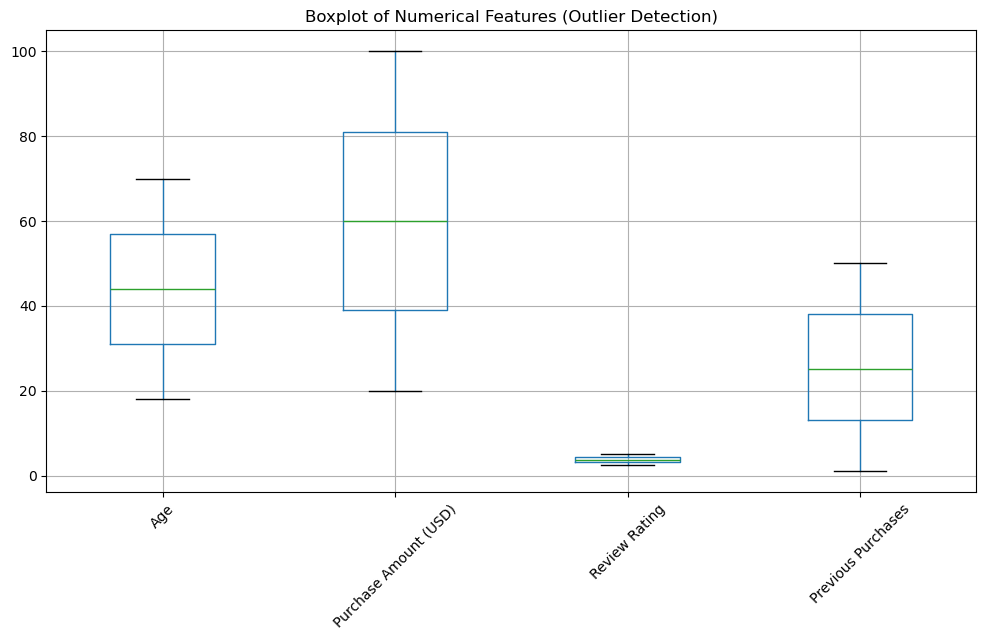

In [8]:
# Detecting outliers using boxplots.
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['int64', 'float64']).boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.show()

- Age: No extreme outliers detected.
- Purchase Amount (USD): Some points extend possible indicating high-value purchases as outliers.
- Previous Purchases: The spread suggests potential outliers for customers with a very high number of past purchases.

If outliers significantly affect model performance, they might need to be transformed or removed.

In [14]:
# Checking unique values for categorical columns
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()} unique values")

Gender: 2 unique values
Item Purchased: 25 unique values
Category: 4 unique values
Location: 50 unique values
Size: 4 unique values
Color: 25 unique values
Season: 4 unique values
Subscription Status: 2 unique values
Shipping Type: 6 unique values
Discount Applied: 2 unique values
Promo Code Used: 2 unique values
Payment Method: 6 unique values
Frequency of Purchases: 7 unique values


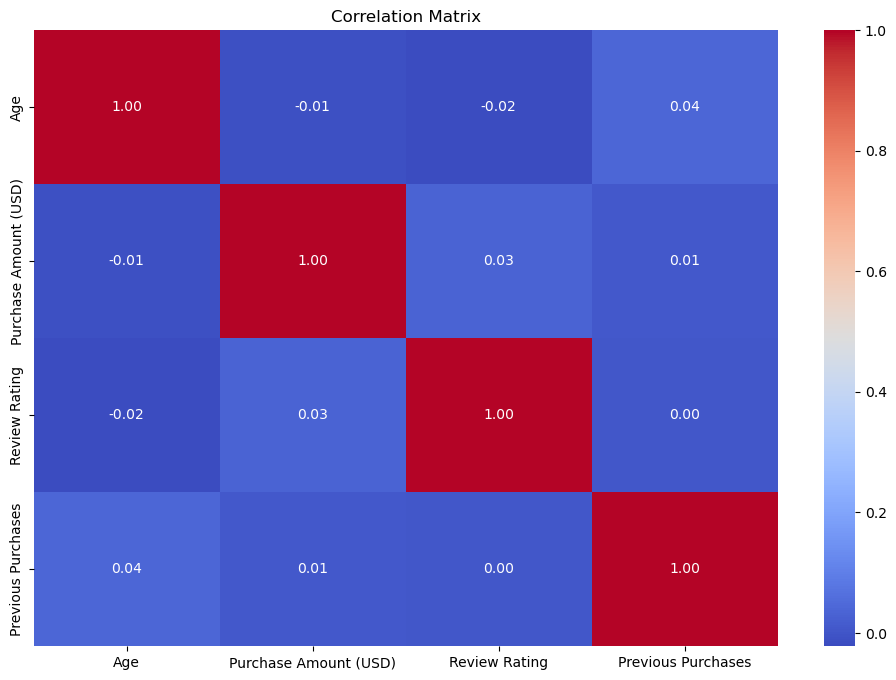

In [10]:
# Checking correlation between numerical variables.
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

There is no strong correlations between the numerical variables. The highest correlation is to 0.03, meaning variables are independent.
Creating new features might improve model performance.

In [16]:
# Checking if a 'target' column exists
if 'target' in df.columns:
    print("Target Variable Distribution:")
    print(df['target'].value_counts())
else:
    print("No explicit target column found. Likely an unsupervised task.")

No explicit target column found. Likely an unsupervised task.


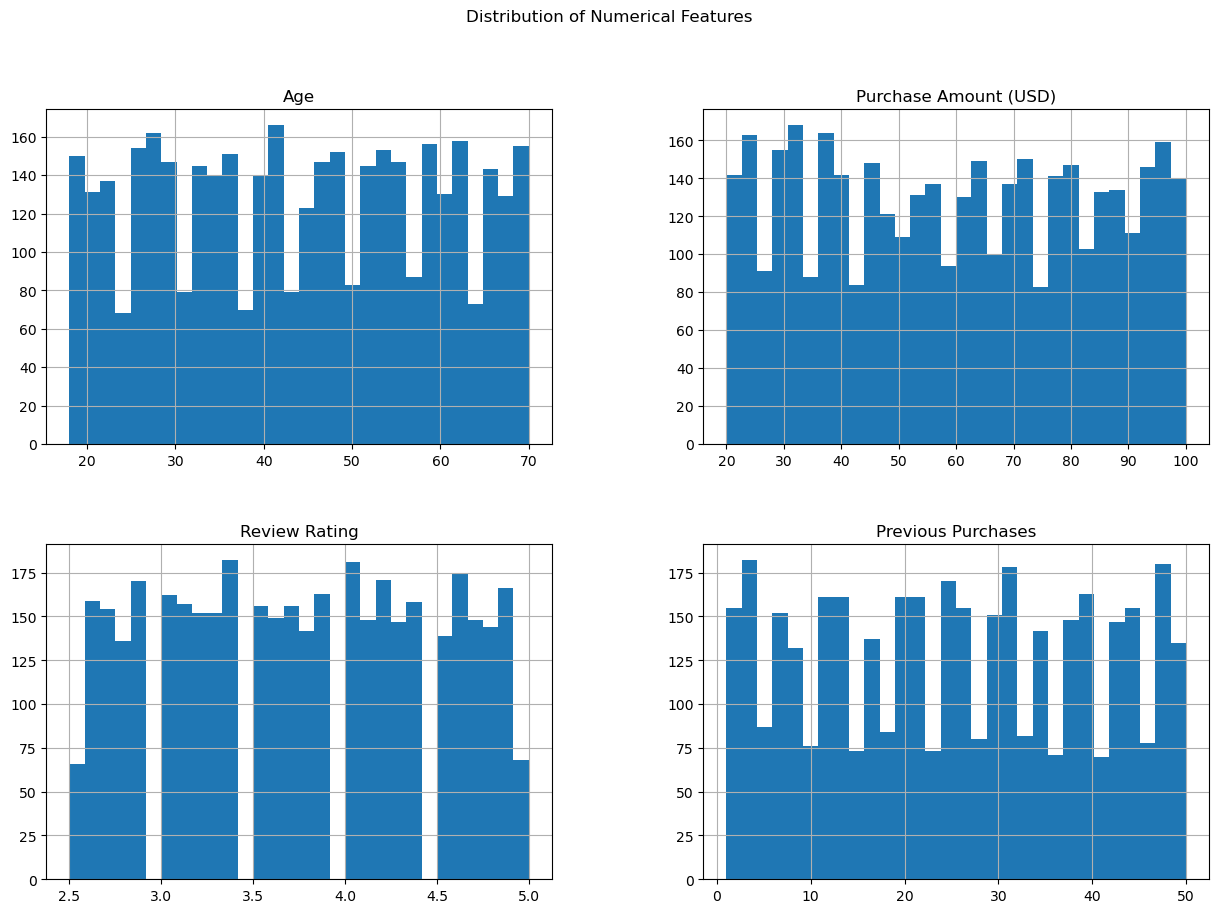

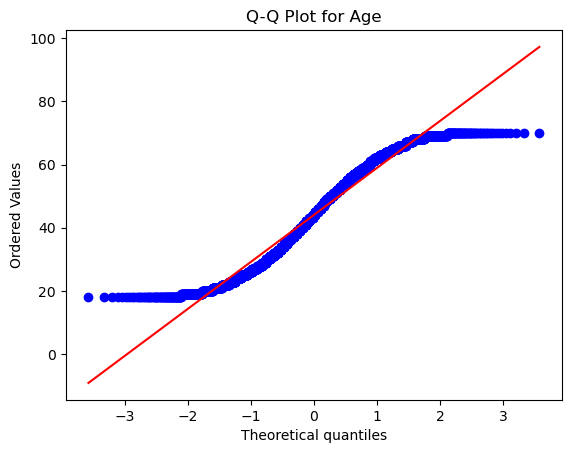

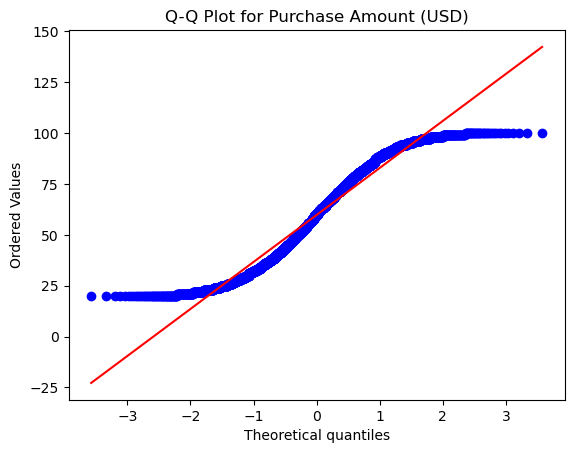

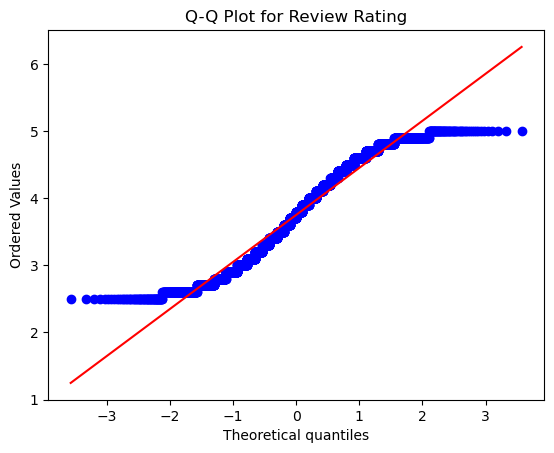

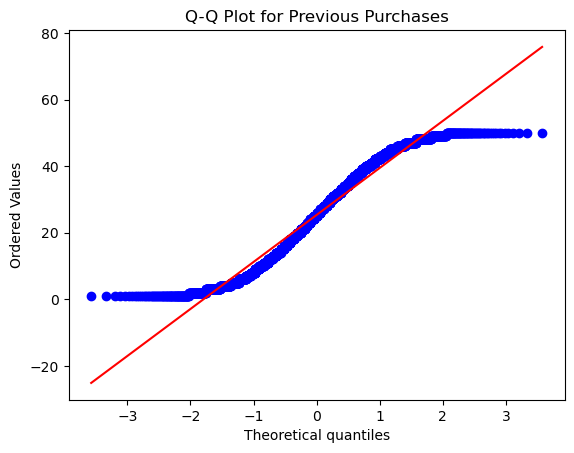

In [15]:
import scipy.stats as stats

# Plot histograms
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Checking normality of key numerical variables
for col in df.select_dtypes(include=np.number).columns:
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

- Age: The distribution is uniform which suggets that customers from all age groups make purchases.
- Purchase Amount (USD): The data is evenly spread, meaning customers make purchases across different price ranges.
- Review Rating: A multi-modal distribution, likely due to customers giving whole number ratings.
- Previous Purchases: The distribution shows some skew, meaning some customers have made significantly more purchases than others.

From the age distribution we could suggest that targeting customers of all ages is viable.
From the purchase amount histogram we can infer that the spending behavior is quite balanced.

In [20]:
# Identifying possible transformations
# Check categorical encoding necessity
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)

# Example: One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=np.number)), columns=df.select_dtypes(include=np.number).columns)
print(df_scaled.head())

Categorical Columns: Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')
        Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0  0.718913              -0.285629      -0.907584           -0.785831
1 -1.648629               0.178852      -0.907584           -1.616552
2  0.390088               0.558882      -0.907584           -0.162789
3 -1.517099               1.276716      -0.349027            1.637107
4  0.061263              -0.454531      -1.466141            0.391025


In [23]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [22]:
preprocessor = DataPreprocessor()

# Preprocess the data
df_processed = preprocessor.preprocess_data(df)

# Check the shape of processed data
print("Original data shape:", df.shape)
print("Processed data shape:", df_processed.shape)

# Display first few rows of processed data
print("\nFirst few rows of processed data:")
print(df_processed.head())

Original data shape: (3900, 17)
Processed data shape: (3900, 146)

First few rows of processed data:
        Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
0  0.718913              -0.285629      -0.907584           -0.785831   
1 -1.648629               0.178852      -0.907584           -1.616552   
2  0.390088               0.558882      -0.907584           -0.162789   
3 -1.517099               1.276716      -0.349027            1.637107   
4  0.061263              -0.454531      -1.466141            0.391025   

  Age_Group Price_Category Customer_Segment  Gender_Female  Gender_Male  \
0    Senior         Medium              New          False         True   
1     Young           High              New          False         True   
2     Adult           High          Regular          False         True   
3     Young        Premium            Loyal          False         True   
4     Adult         Medium          Regular          False         True   

   Item P

The preprocessing pipeline will:

- Remove outliers from numerical features.
- Handle any missing values in the future.
- Transform features for easier interpretation.
- Create dummy variables for the categorical features.
- Scale numerical features.
- Select relevant features based on variance and uniqueness.

In [24]:
target_column = df['Frequency of Purchases']

def train_models(df, target_column, n_splits=5):
    """
    Trains multiple models (Linear Regression, Lasso, Ridge, Random Forest, KMeans, PCA) and evaluates their performance.

    Args:
        df (pd.DataFrame): The dataset.
        target_column (str): The name of the target column.
        n_splits (int): Number of folds for cross-validation.

    Returns:
        dict: A dictionary with model names as keys and cross-validation performance metrics.
    """
    # Separate features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]

In [25]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KMeans (Unsupervised)": KMeans(n_clusters=3, random_state=42),
    "PCA (Dimensionality Reduction)": PCA(n_components=3)
    }

# Initialize results dictionary
results = {}

In [27]:
# Define the number of splits for cross-validation
n_splits = 5

# Perform N-fold cross-validation for each model (excluding unsupervised models from scoring)
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for name, model in models.items():
    if name in ["KMeans (Unsupervised)", "PCA (Dimensionality Reduction)"]:
        model.fit(X)  # Fit unsupervised models directly
        explained_variance = model.explained_variance_ratio_ if name == "PCA (Dimensionality Reduction)" else None
        results[name] = {"Explained Variance": explained_variance}
    else:
        scores = cross_val_score(model, X, y, cv=kf, scoring='r2')  # R-squared as performance measure
        results[name] = {
            "Mean R2 Score": np.mean(scores),
            "Std Dev R2 Score": np.std(scores)
        }

print(results)

NameError: name 'X' is not defined